In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

In [2]:
img = cv2.imread('images/evening.jpg')

In [3]:
r, g, b = cv2.split(img)

In [4]:
pca = PCA(20)

r_transformed = pca.fit_transform(r)
r_inverted    = pca.inverse_transform(r_transformed)

g_transformed = pca.fit_transform(g)
g_inverted    = pca.inverse_transform(g_transformed)

b_transformed = pca.fit_transform(b)
b_inverted    = pca.inverse_transform(b_transformed)

rgb = (
    r_inverted, 
    g_inverted,
    b_inverted
)

In [5]:
compressed_img = (np.dstack(rgb)).astype(np.uint8)

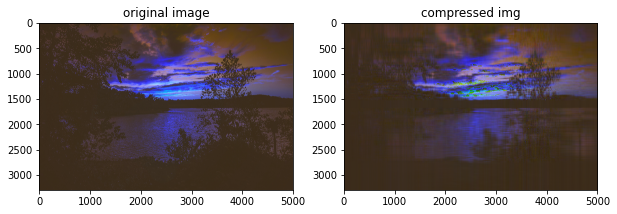

In [6]:
plt.figure(figsize = (10, 20))

plt.subplot(1, 2, 1)
plt.title('original image')
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.title('compressed img')
plt.imshow(compressed_img)

plt.show()